## 1. env setup

In [2]:
!pip install ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 135.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


## 2. get data

In [3]:
from ultralytics import YOLO
from roboflow import Roboflow

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
rf = Roboflow(api_key="***")
project = rf.workspace("latifa-sassi-zqgnz").project("fire-smoke-mx4z8")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to fire-smoke-1 in yolov8:: 100%|██████████| 18032/18032 [00:02<00:00, 7630.46it/s]


## 3. inspect dataset

Sample images: ['middle_-3585-_jpg.rf.a95c75d2b82070e09db1221f7100dcee.jpg', 'middle_-4540-_jpg.rf.260d4c5c4e95a2bb47c7186fcbf2355f.jpg', 'large_-611-_jpg.rf.2cd642402341dc52d277c560bbdd520e.jpg', 'middle_-3884-_jpg.rf.0313f6ec9825f4b27543bdf5d74a0a2d.jpg', 'large_-1304-_jpg.rf.c710fac1cad45dc46b37231afb3845a1.jpg']


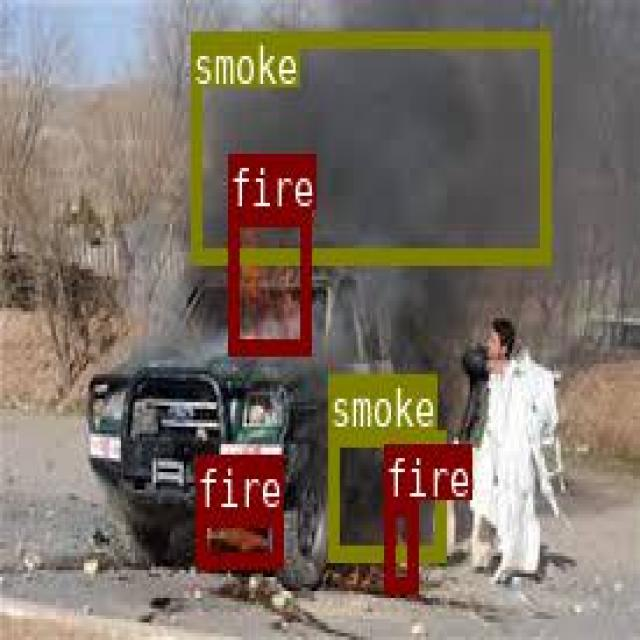

In [6]:
import os
from PIL import Image
from IPython.display import Image as DisplayImage

img_path = "fire-smoke-1/train/images"
print("Sample images:", os.listdir(img_path)[:5])
# Display the first image using IPython.display.Image
first_image_path = os.path.join(img_path, os.listdir(img_path)[0])
display(DisplayImage(filename=first_image_path))

## 4. train yolov8

In [7]:
model = YOLO("yolov8n.pt")

model.train(data = "fire-smoke-1/data.yaml",
            epochs = 15,
            imgsz=640,
            batch=32,
            name="fire_smoke_yolov8")

Ultralytics 8.3.226 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=fire-smoke-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=fire_smoke_yolov8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, 

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78c0c4a0a4b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

## 5. get metrics

In [8]:
metrics = model.val()
print(metrics)

Ultralytics 8.3.226 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1190.1±548.4 MB/s, size: 37.4 KB)
val: Scanning /content/fire-smoke-1/valid/labels.cache... 1680 images, 12 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1680/1680 3.3Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 105/105 6.7it/s 15.6s
                   all       1680       4147       0.99      0.992      0.994       0.98
                  fire       1637       3002      0.989      0.989      0.993      0.972
                 smoke        776       1145      0.991      0.994      0.995      0.988
Speed: 1.1ms preprocess, 3.7ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to /content/runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])


## 6. make predictions


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1137 /content/fire-smoke-1/test/images/large_-1003-_jpg.rf.46aa9bf519a7eeec81a56fdb242590fa.jpg: 640x640 2 fires, 1 smoke, 9.2ms
image 2/1137 /content/fire-smoke-1/test/images/large_-1010-_jpg.rf.65b46697887e2612c1db5a6fe760395f.jpg: 640x640 1 fire, 2 smokes, 7.3ms
image 3/1137 /content/fire-smoke-1/test/images/large_-1012-_jpg.rf.c2a633dee6fb347d51e0df50bbd363e9.jpg: 640x640 2 fires, 7.3ms
image 4/1137 /content/fire-smoke-1/test/images/large_-

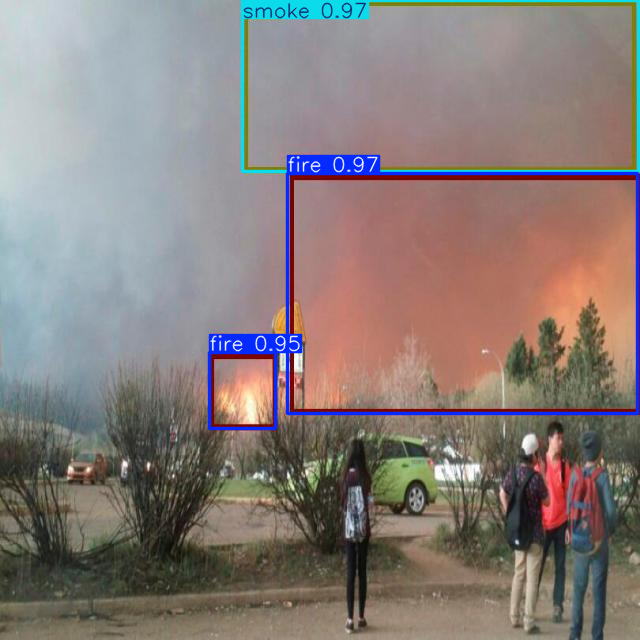

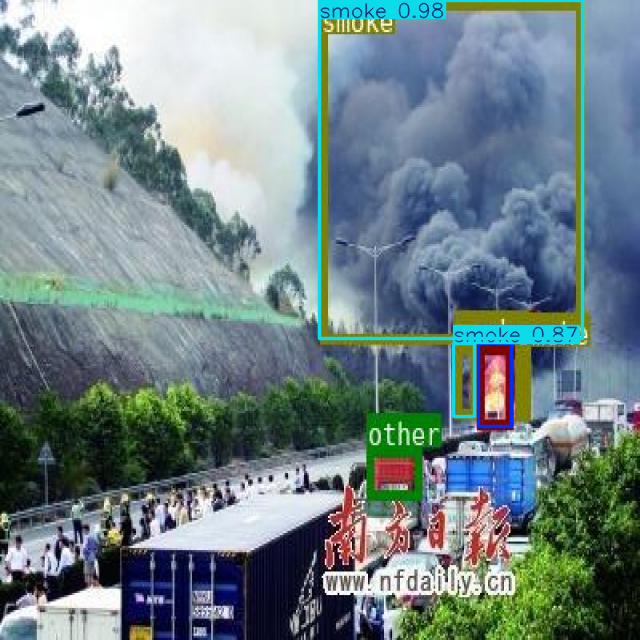

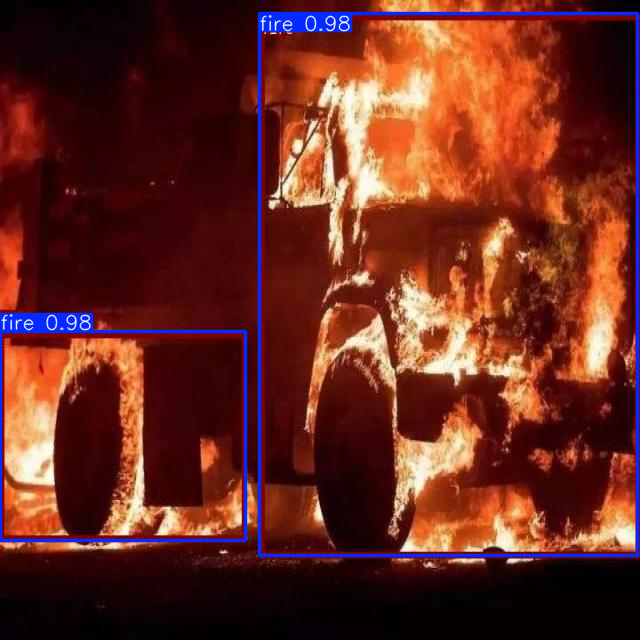

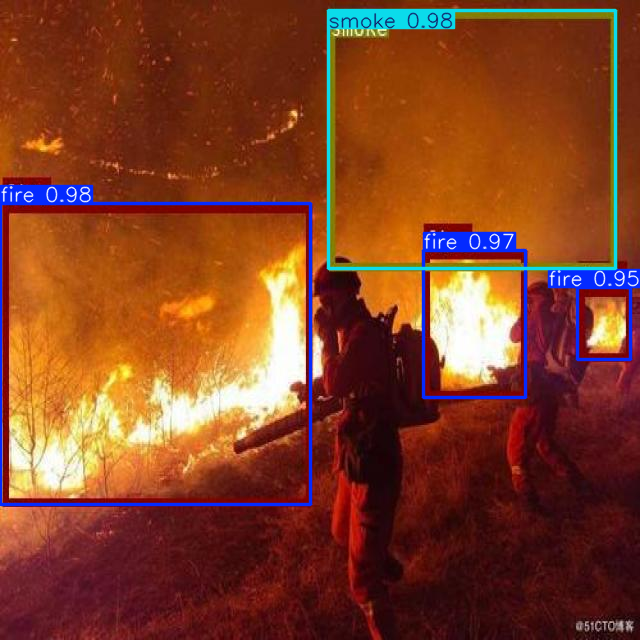

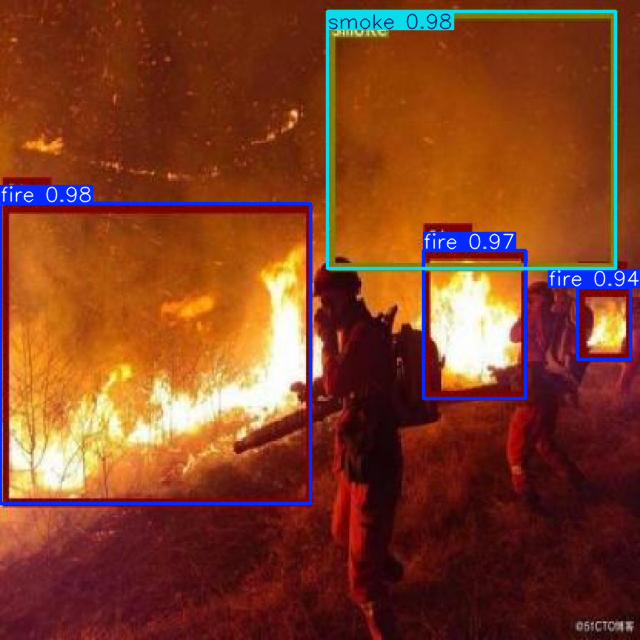

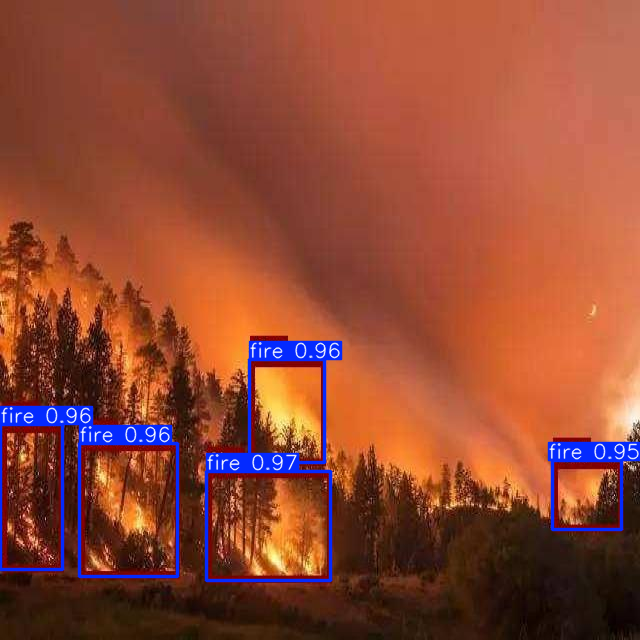

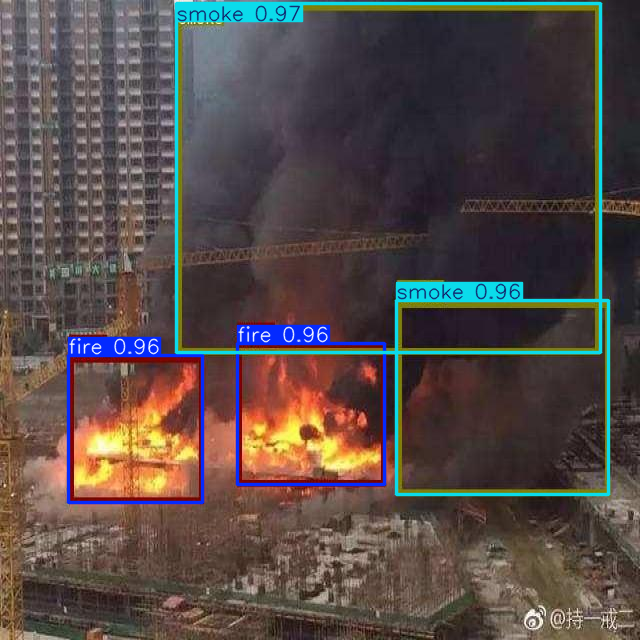

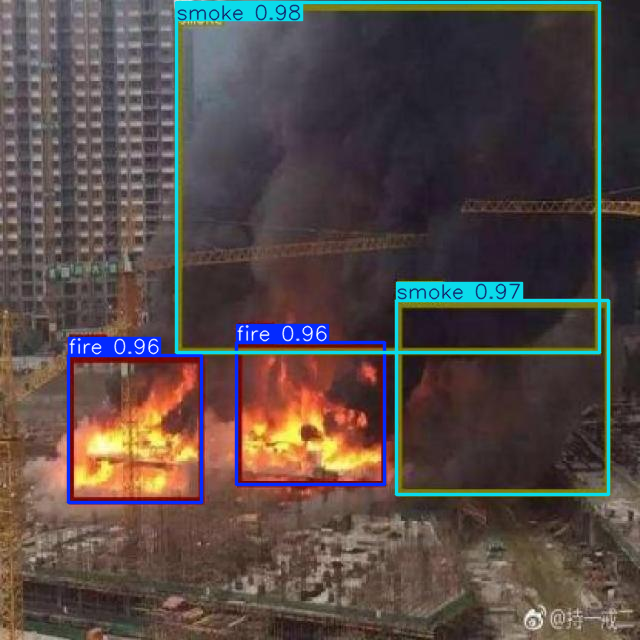

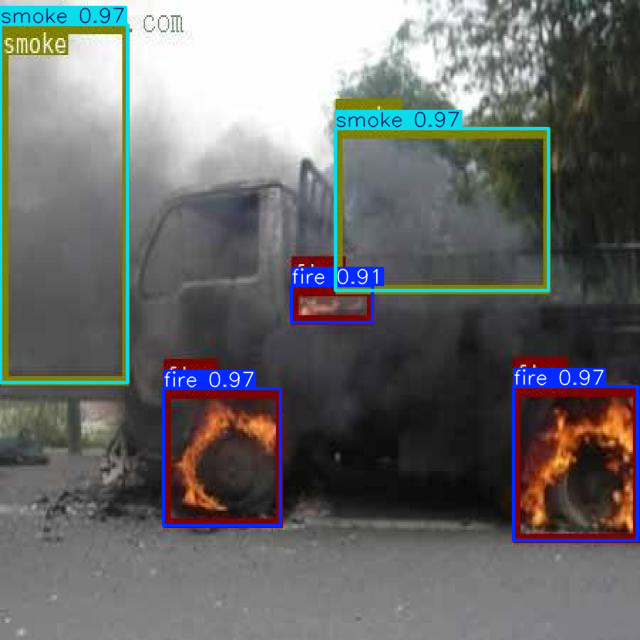

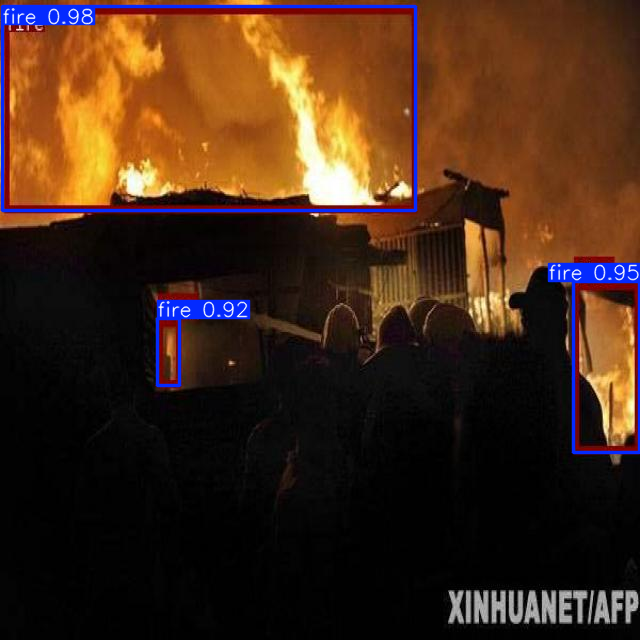

In [9]:
results = model.predict(source="/content/fire-smoke-1/test/images", conf=0.5)
for i, r in enumerate(results):
    if i >= 10:
        break
    r.show()